# 1. Downloading the data

In [286]:
from urllib.request import urlretrieve # Python 3
# from urllib import urlretrieve # Python 2
data_names = ['Locust_' + str(i) + '.dat.gz' for i in range(1,5)]
data_src = ['http://xtof.disque.math.cnrs.fr/data/' + n
            for n in data_names]
data_src
#[urlretrieve(data_src[i],data_names[i]) for i in range(4)]

['http://xtof.disque.math.cnrs.fr/data/Locust_1.dat.gz',
 'http://xtof.disque.math.cnrs.fr/data/Locust_2.dat.gz',
 'http://xtof.disque.math.cnrs.fr/data/Locust_3.dat.gz',
 'http://xtof.disque.math.cnrs.fr/data/Locust_4.dat.gz']

# Importing required modules & load data

In [287]:
import os
print(os.getcwd() + "\n")

c:\Users\khushbu_fegade\Downloads



In [288]:
from os import system
#[system("gunzip " + fn) for fn in data_names]

In [289]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [290]:
pip install hdbscan

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [291]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [292]:
pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [293]:
#os.chdir("C:/Users/CEPCNO2/PycharmProjects/pythonProject1")
import sorting_with_python as swp

In [294]:
import numpy as np
import matplotlib.pylab as plt
import math as m
plt.ion()

# Loading Data

In [295]:
# Create a list with the file names
data_files_names = ['C:/Users/khushbu_fegade/Downloads/Locust_' + str(i) + '.dat' for i in range(1,5)]
print(data_files_names)
# Get the lenght of the data in the files
data_len = np.unique(list(map(len, map(lambda n:
                                       np.fromfile(n,np.double),
                                       data_files_names))))[0]
# Load the data in a list of numpy arrays
data = [np.fromfile(n,np.double) for n in data_files_names]

['C:/Users/khushbu_fegade/Downloads/Locust_1.dat', 'C:/Users/khushbu_fegade/Downloads/Locust_2.dat', 'C:/Users/khushbu_fegade/Downloads/Locust_3.dat', 'C:/Users/khushbu_fegade/Downloads/Locust_4.dat']


In [296]:
data

[array([ 0.387, -0.298, -0.975, ..., -0.814, -1.089, -0.304],
       shape=(300000,)),
 array([ 0.138, -0.956, -0.119, ..., -0.68 , -1.204, -0.137],
       shape=(300000,)),
 array([ 0.077,  0.612,  0.315, ..., -1.088, -1.172, -0.339],
       shape=(300000,)),
 array([-0.722, -1.347, -0.742, ..., -0.703, -0.953, -0.953],
       shape=(300000,))]

In [297]:
def get_correlation_df(site):
    return pd.DataFrame(zip(site[0], site[1], site[2], site[3]),  columns=['site1', 'site2', 'site3', 'site4'])

In [298]:
ns = data[0]
ns

array([ 0.387, -0.298, -0.975, ..., -0.814, -1.089, -0.304],
      shape=(300000,))

In [299]:
import pandas as pd

In [300]:
df = get_correlation_df(data)
df.shape

(300000, 4)

In [301]:
for col in df:
    print(col, df[col].mean(), df[col].std() )

site1 -5.5940437467446224e-18 0.9999999999999972
site2 6.625811010962934e-18 0.9999999999999918
site3 -1.2541079286165769e-17 1.0000000000000033
site4 -1.7503036057557135e-17 0.9999999999997984


In [302]:
def convert_to_phase(site):
    return list(map(lambda x: m.atan(x), site))

In [303]:
def calculate_mean(site):
    return (np.mean(site))

In [304]:
def calculate_dev(site):
    return site - calculate_mean(site)

In [305]:
dev_site1 = calculate_dev(convert_to_phase(data[0]))
dev_site2 = calculate_dev(convert_to_phase(data[1]))
dev_site3 = calculate_dev(convert_to_phase(data[2]))
dev_site4 = calculate_dev(convert_to_phase(data[3]))

In [306]:
dev_data = [dev_site1, dev_site2, dev_site3, dev_site4]

In [307]:
#Correlation between original vectors
get_correlation_df(data).corr()

,site1,site2,site3,site4
site1,1.000000,0.674947,0.527270,0.595277
site2,0.674947,1.000000,0.642613,0.536515
site3,0.527270,0.642613,1.000000,0.577765
site4,0.595277,0.536515,0.577765,1.000000


In [308]:
temp_data = [convert_to_phase(data[0]), convert_to_phase(data[1]), convert_to_phase(data[2]), convert_to_phase(data[3])]
get_correlation_df(data).corr()

,site1,site2,site3,site4
site1,1.000000,0.674947,0.527270,0.595277
site2,0.674947,1.000000,0.642613,0.536515
site3,0.527270,0.642613,1.000000,0.577765
site4,0.595277,0.536515,0.577765,1.000000


In [309]:
#Correlation between deviation
get_correlation_df(dev_data).corr()

,site1,site2,site3,site4
site1,1.000000,0.579449,0.472697,0.549698
site2,0.579449,1.000000,0.480947,0.462239
site3,0.472697,0.480947,1.000000,0.451171
site4,0.549698,0.462239,0.451171,1.000000


# 3. Preliminary analysis

## Five Number summary

In [310]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
site1,300000.0,-5.594044e-18,1.0,-9.074056,-0.371387,-0.029185,0.326437,10.626049
site2,300000.0,6.625811e-18,1.0,-8.228523,-0.449976,-0.036224,0.395918,11.741931
site3,300000.0,-1.254108e-17,1.0,-6.889837,-0.529526,-0.042100,0.469103,9.849076
site4,300000.0,-1.750304e-17,1.0,-7.346540,-0.491728,-0.039868,0.431220,10.564420


In [311]:
from scipy.stats.mstats import mquantiles
np.set_printoptions(precision=3)
[mquantiles(x,prob=[0,0.25,0.5,0.75,1]) for x in data]

[array([-9.074, -0.371, -0.029,  0.326, 10.626]),
 array([-8.229, -0.45 , -0.036,  0.396, 11.742]),
 array([-6.89 , -0.53 , -0.042,  0.469,  9.849]),
 array([-7.347, -0.492, -0.04 ,  0.431, 10.564])]

## Were the data normalized?

In [312]:
[np.std(x) for x in data]

[np.float64(0.9999983333319417),
 np.float64(0.9999983333319362),
 np.float64(0.9999983333319479),
 np.float64(0.9999983333317428)]

## Discretization step amplitude

In [313]:
[np.min(np.diff(np.sort(np.unique(x)))) for x in data]

[np.float64(0.006709845078411547),
 np.float64(0.009194500187932775),
 np.float64(0.011888432902217971),
 np.float64(0.009614042128660572)]

# 4. Plot the data

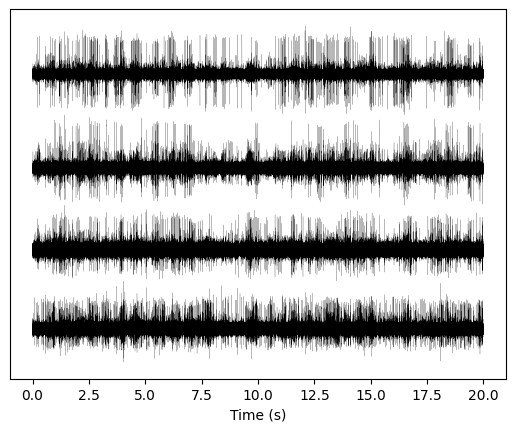

In [314]:
#fig_size = plt.rcParams["figure.figsize"]
#fig_size[0] = 15
#fig_size[1] = 8
#plt.rcParams["figure.figsize"] = fig_size
tt = np.arange(0,data_len)/1.5e4
swp.plot_data_list(data,tt,0.1)

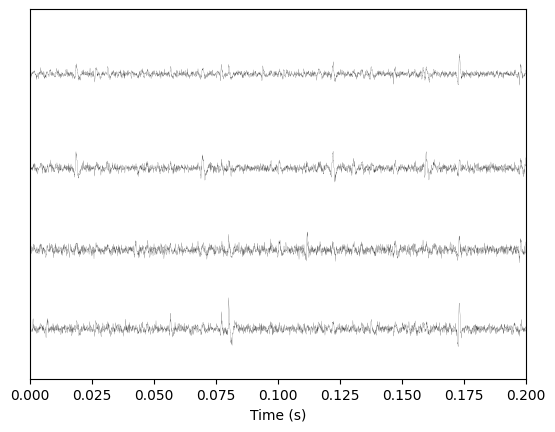

In [315]:
plt.xlim([0,0.2])
swp.plot_data_list(data,tt,0.1)

# 5. Data renormalization

In [316]:
data_mad = list(map(swp.mad,data))
data_mad

[np.float64(0.5172968482892563),
 np.float64(0.6270612350170097),
 np.float64(0.7402832060747951),
 np.float64(0.6841813852777244)]

In [317]:
data = list(map(lambda x: (x-np.median(x))/swp.mad(x), data))

In [318]:
"""We can check on a plot (Fig. \ref{fig:site1-with-MAD-and-SD}) how MAD and SD compare"""

'We can check on a plot (Fig. \ref{fig:site1-with-MAD-and-SD}) how MAD and SD compare'

(-5.0, 10.0)

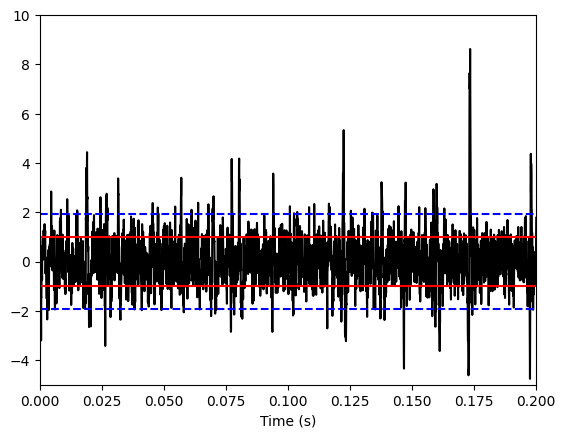

In [319]:
plt.plot(tt,data[0],color="black")
plt.xlim([0,0.2])
plt.ylim([-17,13])
plt.axhline(y=1,color="red")
plt.axhline(y=-1,color="red")
plt.axhline(y=np.std(data[0]),color="blue",linestyle="dashed")
plt.axhline(y=-np.std(data[0]),color="blue",linestyle="dashed")
plt.xlabel('Time (s)')
plt.ylim([-5,10])

## A quick check that the MAD "does its job"

Text(0, 0.5, 'Empirical quantiles')

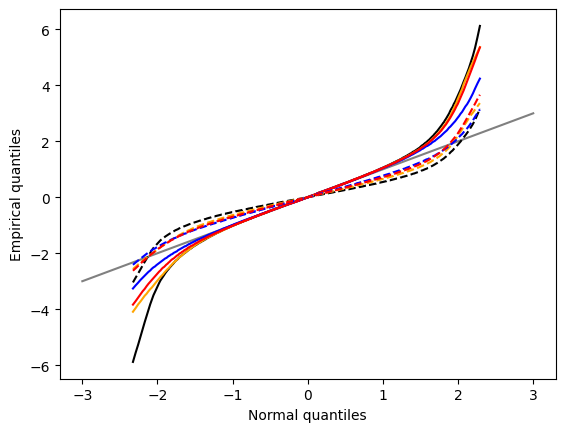

In [320]:
dataQ = map(lambda x:
            mquantiles(x, prob=np.arange(0.01,0.99,0.001)),data)
dataQsd = map(lambda x:
              mquantiles(x/np.std(x), prob=np.arange(0.01,0.99,0.001)),
              data)
from scipy.stats import norm
qq = norm.ppf(np.arange(0.01,0.99,0.001))
plt.plot(np.linspace(-3,3,num=100),np.linspace(-3,3,num=100),
         color='grey')
colors = ['black', 'orange', 'blue', 'red']
for i,y in enumerate(dataQ):
    plt.plt.plot(qq,y,color=colors[i])

for i,y in enumerate(dataQsd):
    plt.plot(qq,y,color=colors[i],linestyle="dashed")

plt.xlabel('Normal quantiles')
plt.ylabel('Empirical quantiles')

# 6. Detect peaks

In [321]:
from scipy.signal import fftconvolve
from numpy import apply_along_axis as apply 
data_filtered = apply(lambda x:
                      fftconvolve(x,np.array([1,1,1,1,1])/5.,'same'),
                      1,np.array(data))
data_filtered = (data_filtered.transpose() / \
                 apply(swp.mad,1,data_filtered)).transpose()
data_filtered[data_filtered < 4] = 0

Text(0.5, 0, 'Time (s)')

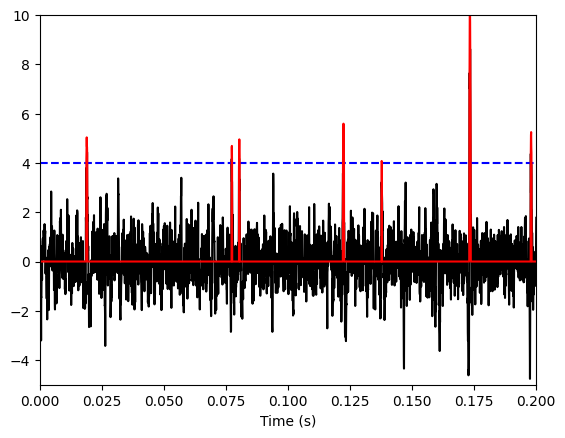

In [322]:
plt.plot(tt, data[0],color='black')
plt.axhline(y=4,color="blue",linestyle="dashed")
plt.plot(tt, data_filtered[0,],color='red')
plt.xlim([0,0.2])
plt.ylim([-5,10])
plt.xlabel('Time (s)')

In [323]:
sp0 = swp.peak(data_filtered.sum(0))

In [324]:
len(sp0)

1795

In [325]:
round(np.mean(np.diff(sp0)))

167

In [326]:
round(np.std(np.diff(sp0)))

144

In [327]:
np.min(np.diff(sp0))

np.int64(16)

In [328]:
np.max(np.diff(sp0))

np.int64(1157)

## 6.1 Interactive spike detection check

(0.0, 0.2)

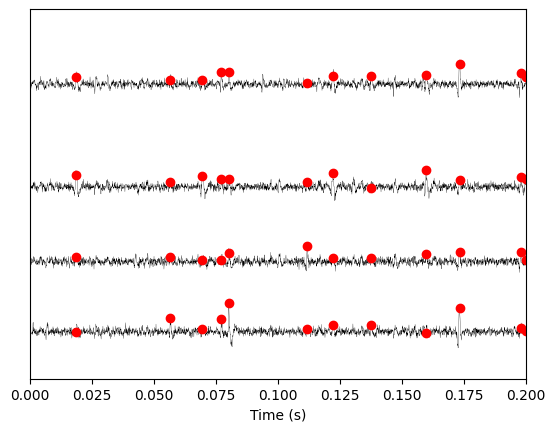

In [329]:
swp.plot_data_list_and_detection(data,tt,sp0)
plt.xlim([0,0.2])

## 6.2 Split the data set in two parts

In [330]:
sp0E = sp0[sp0 <= data_len/2.]
len(sp0E)

908

In [331]:
sp0L = sp0[sp0 > data_len/2.]
len(sp0L)

887

# 7. Cuts

In [332]:
evtsE = swp.mk_events(sp0E,np.array(data),49,50)
evtsE_median=apply(np.median,0,evtsE)
evtsE_mad=apply(swp.mad,0,evtsE)

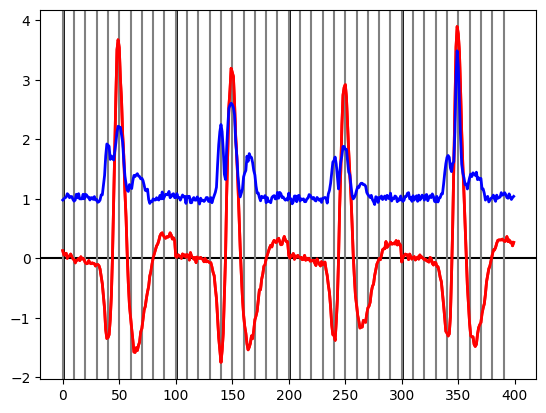

In [333]:
plt.plot(evtsE_median, color='red', lw=2)
plt.axhline(y=0, color='black')
for i in np.arange(0,400,100): 
    plt.axvline(x=i, color='black', lw=2)

for i in np.arange(0,400,10): 
    plt.axvline(x=i, color='grey')

plt.plot(evtsE_median, color='red', lw=2)
plt.plot(evtsE_mad, color='blue', lw=2)

## 7.1 Events

In [334]:
evtsE = swp.mk_events(sp0E,np.array(data),14,30)

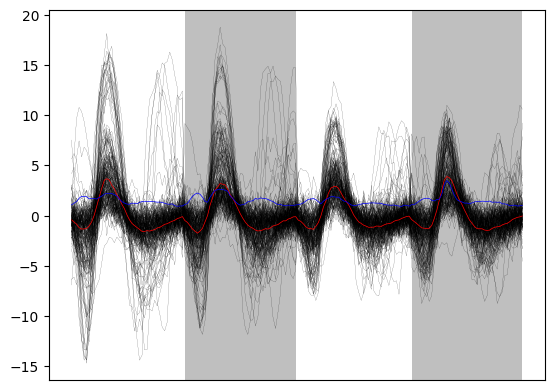

In [335]:
swp.plot_events(evtsE,200)

## 7.2 Noise

In [336]:
noiseE = swp.mk_noise(sp0E,np.array(data),14,30,safety_factor=2.5,size=2000)

## 7.3 Getting clean events

In [337]:
def good_evts_fct(samp, thr=3):
    samp_med = apply(np.median,0,samp)
    samp_mad = apply(swp.mad,0,samp)
    above = samp_med > 0
    samp_r = samp.copy()
    for i in range(samp.shape[0]): samp_r[i,above] = 0
    samp_med[above] = 0
    res = apply(lambda x:
                np.all(abs((x-samp_med)/samp_mad) < thr),
                1,samp_r)
    return res

In [338]:
goodEvts = good_evts_fct(evtsE,8)

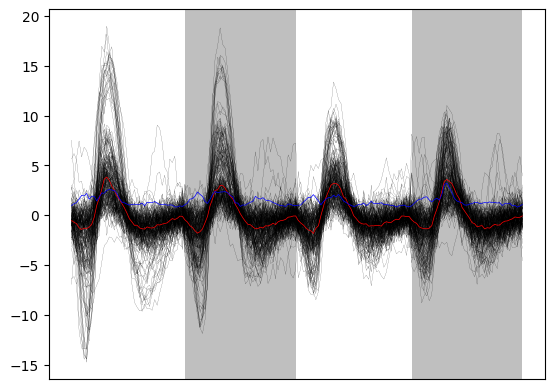

In [339]:
swp.plot_events(evtsE[goodEvts,:][:200,:])

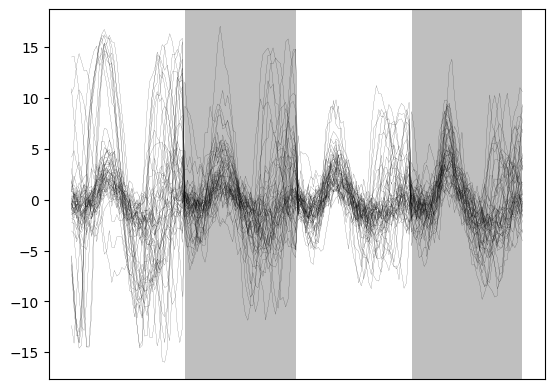

In [340]:
swp.plot_events(evtsE[~ goodEvts,:],
                show_median=False,
                show_mad=False)

# 8. Dimension reduction

## 8.1 Principal Component Analysis (PCA)

In [341]:
from numpy.linalg import svd
varcovmat = np.cov(evtsE[goodEvts,:].T)
u, s, v = svd(varcovmat)

## 8.2 Exploring PCA results

In [342]:
""""Check Graph Scale and Display"""

'"Check Graph Scale and Display'

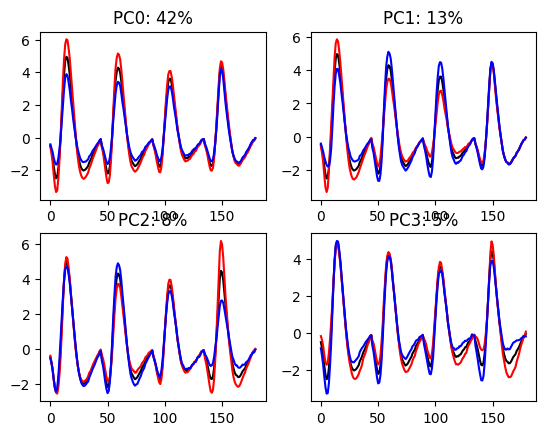

In [343]:
evt_idx = range(180)
evtsE_good_mean = np.mean(evtsE[goodEvts,:],0)
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.plot(evt_idx,evtsE_good_mean, 'black',evt_idx,
             evtsE_good_mean + 5 * u[:,i],
             'red',evt_idx,evtsE_good_mean - 5 * u[:,i], 'blue')
    plt.title('PC' + str(i) + ': ' + str(round(s[i]/sum(s)*100)) +'%')

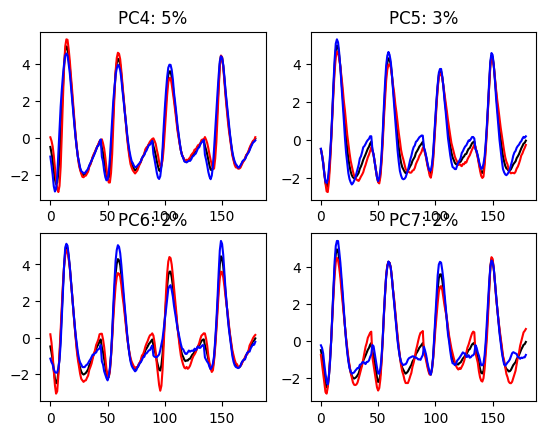

In [344]:
for i in range(4,8):
    plt.subplot(2,2,i-3)
    plt.plot(evt_idx,evtsE_good_mean, 'black',
             evt_idx,evtsE_good_mean + 5 * u[:,i], 'red',
             evt_idx,evtsE_good_mean - 5 * u[:,i], 'blue')
    plt.title('PC' + str(i) + ': ' + str(round(s[i]/sum(s)*100)) +'%')

In [345]:
noiseVar = sum(np.diag(np.cov(noiseE.T)))
evtsVar = sum(s)
[(i,sum(s[:i])+noiseVar-evtsVar) for i in range(15)]

[(0, np.float64(-577.5515048194724)),
 (1, np.float64(-277.4651543291965)),
 (2, np.float64(-187.5634116234221)),
 (3, np.float64(-128.0390776590093)),
 (4, np.float64(-91.31866909961707)),
 (5, np.float64(-58.83988760231341)),
 (6, np.float64(-36.36306744692399)),
 (7, np.float64(-21.54372241400506)),
 (8, np.float64(-8.264495177520189)),
 (9, np.float64(0.28488929424588605)),
 (10, np.float64(6.906733550093804)),
 (11, np.float64(13.341548838374933)),
 (12, np.float64(19.47208909922756)),
 (13, np.float64(25.25533564753391)),
 (14, np.float64(29.10210471304208))]

## Static representation of the projected data

array([[<Axes: xlabel='0', ylabel='0'>, <Axes: xlabel='1', ylabel='0'>,
        <Axes: xlabel='2', ylabel='0'>, <Axes: xlabel='3', ylabel='0'>],
       [<Axes: xlabel='0', ylabel='1'>, <Axes: xlabel='1', ylabel='1'>,
        <Axes: xlabel='2', ylabel='1'>, <Axes: xlabel='3', ylabel='1'>],
       [<Axes: xlabel='0', ylabel='2'>, <Axes: xlabel='1', ylabel='2'>,
        <Axes: xlabel='2', ylabel='2'>, <Axes: xlabel='3', ylabel='2'>],
       [<Axes: xlabel='0', ylabel='3'>, <Axes: xlabel='1', ylabel='3'>,
        <Axes: xlabel='2', ylabel='3'>, <Axes: xlabel='3', ylabel='3'>]],
      dtype=object)

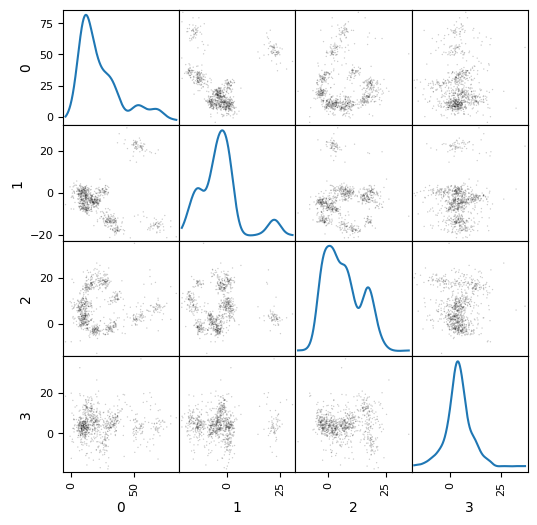

In [346]:
evtsE_good_P0_to_P3 = np.dot(evtsE[goodEvts,:],u[:,0:4])
from pandas.plotting import scatter_matrix
import pandas as pd
df = pd.DataFrame(evtsE_good_P0_to_P3)
scatter_matrix(df,alpha=0.2,s=4,c='k',figsize=(6,6),
               diagonal='kde',marker=".")

## 8.4 Dynamic visualization of the data with GGobi

In [347]:
import csv
f = open('evtsE.csv','w')
w = csv.writer(f)
w.writerows(np.dot(evtsE[goodEvts,:],u[:,:8]))
f.close()

# 9. Clustering with K-Means

In [348]:
from sklearn.cluster import KMeans
km10 = KMeans(n_clusters=10, init='k-means++', n_init=100, max_iter=100)
km10.fit(np.dot(evtsE[goodEvts,:],u[:,0:3]))
c10 = km10.fit_predict(np.dot(evtsE[goodEvts,:],u[:,0:3]))

In [349]:
cluster_median = list([(i,
                        np.apply_along_axis(np.median,0,
                                            evtsE[goodEvts,:][c10 == i,:]))
                                            for i in range(10)
                                            if sum(c10 == i) > 0])
cluster_size = list([np.sum(np.abs(x[1])) for x in cluster_median])
new_order = list(reversed(np.argsort(cluster_size)))
new_order_reverse = sorted(range(len(new_order)), key=new_order.__getitem__)
c10b = [new_order_reverse[i] for i in c10]

## 9.1 Cluster specific plots

(-15.0, 20.0)

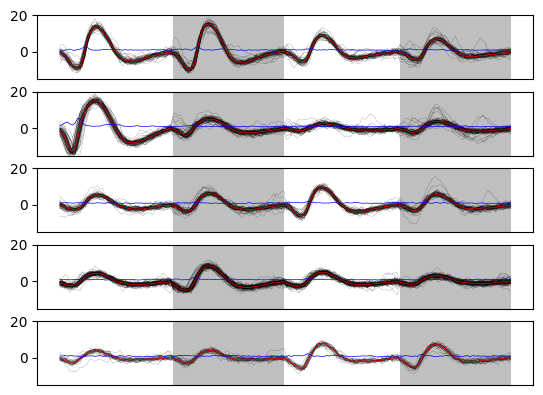

In [350]:
plt.subplot(511)
swp.plot_events(evtsE[goodEvts,:][np.array(c10b) == 0,:])
plt.ylim([-15,20])
plt.subplot(512)
swp.plot_events(evtsE[goodEvts,:][np.array(c10b) == 1,:])
plt.ylim([-15,20])
plt.subplot(513)
swp.plot_events(evtsE[goodEvts,:][np.array(c10b) == 2,:])
plt.ylim([-15,20])
plt.subplot(514)
swp.plot_events(evtsE[goodEvts,:][np.array(c10b) == 3,:])
plt.ylim([-15,20])
plt.subplot(515)
swp.plot_events(evtsE[goodEvts,:][np.array(c10b) == 4,:])
plt.ylim([-15,20])

(-10.0, 10.0)

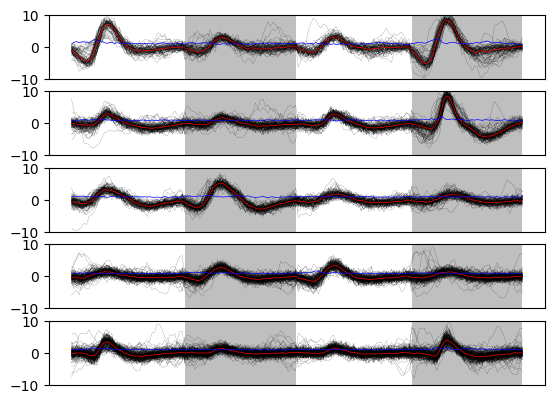

In [351]:
plt.subplot(511)
swp.plot_events(evtsE[goodEvts,:][np.array(c10b) == 5,:])
plt.ylim([-10,10])
plt.subplot(512)
swp.plot_events(evtsE[goodEvts,:][np.array(c10b) == 6,:])
plt.ylim([-10,10])
plt.subplot(513)
swp.plot_events(evtsE[goodEvts,:][np.array(c10b) == 7,:])
plt.ylim([-10,10])
plt.subplot(514)
swp.plot_events(evtsE[goodEvts,:][np.array(c10b) == 8,:])
plt.ylim([-10,10])
plt.subplot(515)
swp.plot_events(evtsE[goodEvts,:][np.array(c10b) == 9,:])
plt.ylim([-10,10])

## 9.2 Results inspection with GGobi

In [352]:
f = open('evtsEsorted.csv','w')
w = csv.writer(f)
w.writerows(np.concatenate((np.dot(evtsE[goodEvts,:],u[:,:8]),
                            np.array([c10b]).T),
                            axis=1))
f.close()

# 10. Spike peeling: a Brute force superposition resolution

In [353]:
centers = { "Cluster " + str(i) :
            swp.mk_center_dictionary(sp0E[goodEvts][np.array(c10b)==i],
                                     np.array(data))
            for i in range(10)}

## 10.1 First peeling

In [354]:
swp.classify_and_align_evt(sp0[0],np.array(data),centers)

[np.str_('Cluster 7'), np.int64(281), np.float64(-0.14107833394834723)]

In [355]:
data0 = np.array(data) 
round0 = [swp.classify_and_align_evt(sp0[i],data0,centers)
          for i in range(len(sp0))]

In [356]:
len([x[1] for x in round0 if x[0] == '?'])

22

In [357]:
pred0 = swp.predict_data(round0,centers)
pred0

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(4, 300000))

In [358]:
data1 = data0 - pred0
data1

array([[ 0.804, -0.519, -1.829, ..., -1.518, -2.049, -0.532],
       [ 0.279, -1.466, -0.132, ..., -1.026, -1.862, -0.161],
       [ 0.161,  0.883,  0.482, ..., -1.413, -1.526, -0.401],
       [-0.998, -1.911, -1.026, ..., -0.97 , -1.335, -1.335]],
      shape=(4, 300000))

(0.9, 1.0)

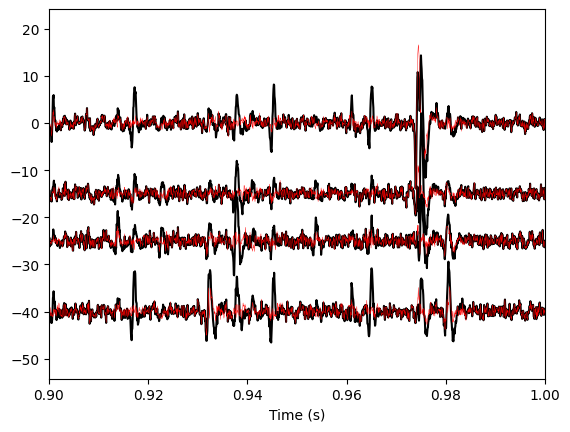

In [359]:
plt.plot(tt, data0[0,], color='black')
plt.plot(tt, data1[0,], color='red',lw=0.3)
plt.plot(tt, data0[1,]-15, color='black')
plt.plot(tt, data1[1,]-15, color='red',lw=0.3)
plt.plot(tt, data0[2,]-25, color='black')
plt.plot(tt, data1[2,]-25, color='red',lw=0.3)
plt.plot(tt, data0[3,]-40, color='black')
plt.plot(tt, data1[3,]-40, color='red',lw=0.3)
plt.xlabel('Time (s)')
plt.xlim([0.9,1])

## 10.2 Second peeling

In [360]:
data_filtered = np.apply_along_axis(lambda x:
                                    fftconvolve(x,np.array([1,1,1])/3.,
                                                'same'),
                                    1,data1)
data_filtered = (data_filtered.transpose() /
                 np.apply_along_axis(swp.mad,1,
                                     data_filtered)).transpose()
data_filtered[data_filtered < 4] = 0
sp1 = swp.peak(data_filtered[0,:])

In [361]:
round1 = [swp.classify_and_align_evt(sp1[i],data1,centers)
          for i in range(len(sp1))]
pred1 = swp.predict_data(round1,centers)
data2 = data1 - pred1

In [362]:
len([x[1] for x in round1 if x[0] == '?'])

58

(0.9, 1.0)

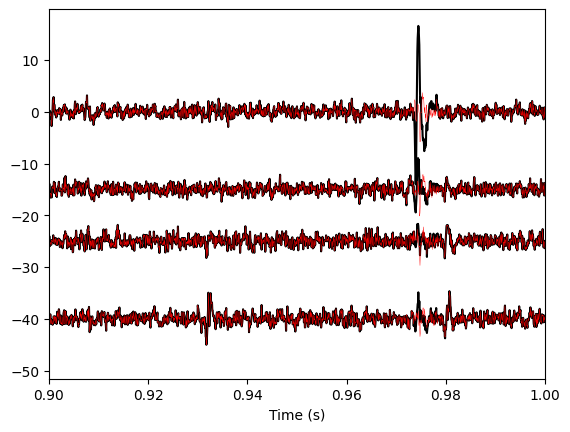

In [363]:
plt.plot(tt, data1[0,], color='black')
plt.plot(tt, data2[0,], color='red',lw=0.3)
plt.plot(tt, data1[1,]-15, color='black')
plt.plot(tt, data2[1,]-15, color='red',lw=0.3)
plt.plot(tt, data1[2,]-25, color='black')
plt.plot(tt, data2[2,]-25, color='red',lw=0.3)
plt.plot(tt, data1[3,]-40, color='black')
plt.plot(tt, data2[3,]-40, color='red',lw=0.3)
plt.xlabel('Time (s)')
plt.xlim([0.9,1])

## 10.3 Third peeling

In [364]:
data_filtered = apply(lambda x:
                      fftconvolve(x,np.array([1,1,1])/3.,'same'),
                      1,data2)
data_filtered = (data_filtered.transpose() / \
                 apply(swp.mad,1,data_filtered)).transpose()
data_filtered[data_filtered < 4] = 0
sp2 = swp.peak(data_filtered[1,:])
len(sp2)

129

In [365]:
round2 = [swp.classify_and_align_evt(sp2[i],data2,centers) for i in range(len(sp2))]
pred2 = swp.predict_data(round2,centers)
data3 = data2 - pred2
len([x[1] for x in round2 if x[0] == '?'])

22

(0.9, 1.0)

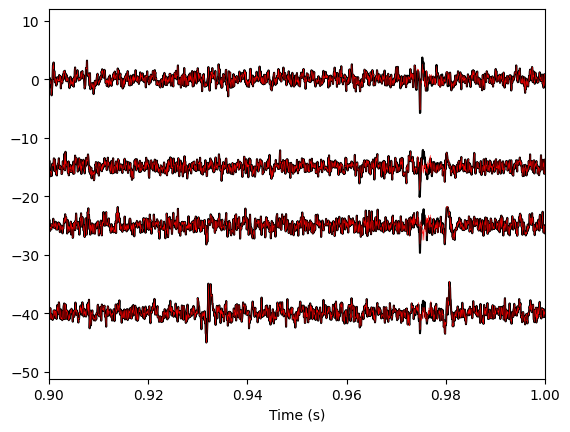

In [366]:
plt.plot(tt, data2[0,], color='black')
plt.plot(tt, data3[0,], color='red',lw=0.3)
plt.plot(tt, data2[1,]-15, color='black')
plt.plot(tt, data3[1,]-15, color='red',lw=0.3)
plt.plot(tt, data2[2,]-25, color='black')
plt.plot(tt, data3[2,]-25, color='red',lw=0.3)
plt.plot(tt, data2[3,]-40, color='black')
plt.plot(tt, data3[3,]-40, color='red',lw=0.3)
plt.xlabel('Time (s)')
plt.xlim([0.9,1])

## 10.4 Fourth peeling

In [367]:
data_filtered = apply(lambda x:
                      fftconvolve(x,np.array([1,1,1])/3.,'same'),
                      1,data3)
data_filtered = (data_filtered.transpose() / \
                 apply(swp.mad,1,data_filtered)).transpose()
data_filtered[data_filtered < 4] = 0
sp3 = swp.peak(data_filtered[2,:])
len(sp3)

99

In [368]:
round3 = [swp.classify_and_align_evt(sp3[i],data3,centers) for i in range(len(sp3))]
pred3 = swp.predict_data(round3,centers)
data4 = data3 - pred3
len([x[1] for x in round3 if x[0] == '?'])

16

(3.9, 4.0)

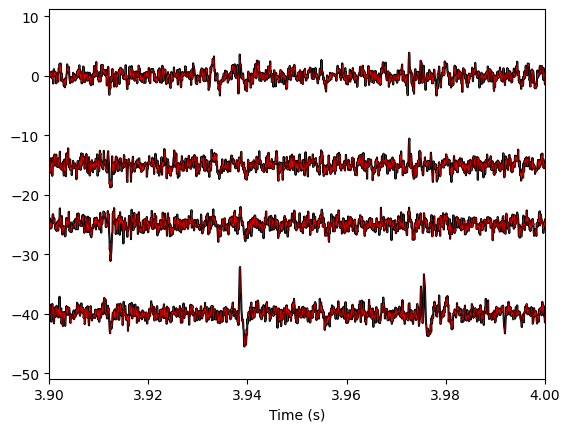

In [369]:
plt.plot(tt, data3[0,], color='black')
plt.plot(tt, data4[0,], color='red',lw=0.3)
plt.plot(tt, data3[1,]-15, color='black')
plt.plot(tt, data4[1,]-15, color='red',lw=0.3)
plt.plot(tt, data3[2,]-25, color='black')
plt.plot(tt, data4[2,]-25, color='red',lw=0.3)
plt.plot(tt, data3[3,]-40, color='black')
plt.plot(tt, data4[3,]-40, color='red',lw=0.3)
plt.xlabel('Time (s)')
plt.xlim([3.9,4])

## 10.5 Fifth peeling

In [370]:
data_filtered = apply(lambda x:
                      fftconvolve(x,np.array([1,1,1])/3.,'same'),
                      1,data4)
data_filtered = (data_filtered.transpose() / \
                 apply(swp.mad,1,data_filtered)).transpose()
data_filtered[data_filtered < 4] = 0
sp4 = swp.peak(data_filtered[3,:])
len(sp4)

170

In [371]:
round4 = [swp.classify_and_align_evt(sp4[i],data4,centers) for i in range(len(sp4))]
pred4 = swp.predict_data(round4,centers)
data5 = data4 - pred4
len([x[1] for x in round4 if x[0] == '?'])

53

(3.9, 4.0)

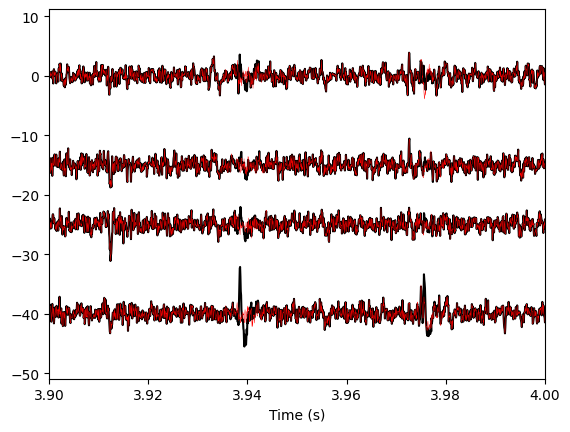

In [372]:
plt.plot(tt, data4[0,], color='black')
plt.plot(tt, data5[0,], color='red',lw=0.3)
plt.plot(tt, data4[1,]-15, color='black')
plt.plot(tt, data5[1,]-15, color='red',lw=0.3)
plt.plot(tt, data4[2,]-25, color='black')
plt.plot(tt, data5[2,]-25, color='red',lw=0.3)
plt.plot(tt, data4[3,]-40, color='black')
plt.plot(tt, data5[3,]-40, color='red',lw=0.3)
plt.xlabel('Time (s)')
plt.xlim([3.9,4])

## 10.6 General comparison

(0.0, 1.0)

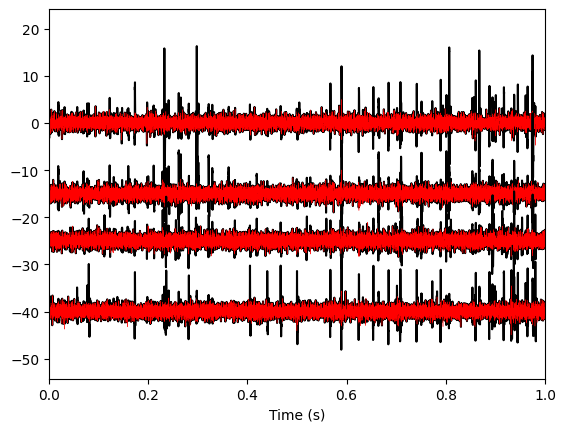

In [373]:
plt.plot(tt, data0[0,], color='black')
plt.plot(tt, data5[0,], color='red',lw=0.3)
plt.plot(tt, data0[1,]-15, color='black')
plt.plot(tt, data5[1,]-15, color='red',lw=0.3)
plt.plot(tt, data0[2,]-25, color='black')
plt.plot(tt, data5[2,]-25, color='red',lw=0.3)
plt.plot(tt, data0[3,]-40, color='black')
plt.plot(tt, data5[3,]-40, color='red',lw=0.3)
plt.xlabel('Time (s)')
plt.xlim([0,1])

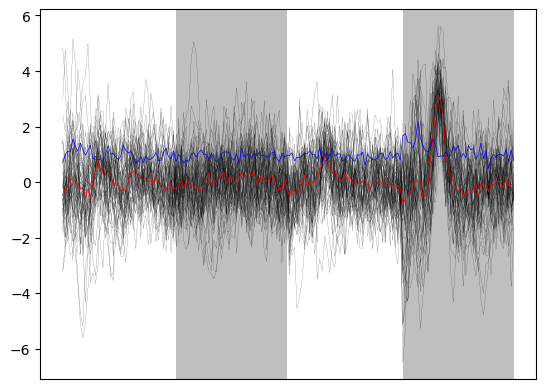

In [374]:
bad_ones = [x[1] for x in round4 if x[0] == '?']
r4BE = swp.mk_events(bad_ones, data4)
swp.plot_events(r4BE)

# 11 Getting the spike trains

In [375]:
round_all = round0.copy() # Python 3
# round_all = round0[:] # Python 2
round_all.extend(round1)
round_all.extend(round2)
round_all.extend(round3)
round_all.extend(round4)
#spike_trains = { n : np.sort([x[1] + x[2] for x in round_all
#                              if x[0] == n]) for n in list(centers)}

# Create spike times dictionary first
spike_times = {
    n: np.sort([x[1] + x[2] for x in round_all if x[0] == n])
    for n in list(centers)
}

spike_trains = {
    n: swp.mk_events([int(t) for t in spike_times[n]], data4, 14, 30)
    for n in spike_times
}

In [376]:
[(n,len(spike_trains[n])) for n in list(centers)]

[('Cluster 0', 92),
 ('Cluster 1', 173),
 ('Cluster 2', 101),
 ('Cluster 3', 173),
 ('Cluster 4', 63),
 ('Cluster 5', 149),
 ('Cluster 6', 238),
 ('Cluster 7', 233),
 ('Cluster 8', 456),
 ('Cluster 9', 588)]

In [377]:
pip install PyWavelets

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [378]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, silhouette_score
)
from scipy.stats import skew, kurtosis
import skfuzzy as fuzz
from scipy.optimize import linear_sum_assignment
import hdbscan
import pywt

In [380]:
def extract_fft_features(spike_signal):
    """Extracts dominant frequency components as features."""
    spike_signal = np.asarray(spike_signal).flatten()
    if spike_signal.size == 0:
        print("Warning: Empty spike signal encountered!")
        return np.zeros(5)
    fft_spectrum = np.fft.fft(spike_signal)
    power_spectrum = np.abs(fft_spectrum) ** 2
    top_freqs = np.argsort(power_spectrum)[-5:]
    return power_spectrum[top_freqs]


In [381]:
# Step 1: Flatten spike_trains into label array
labels = []
spike_waveforms = []

for i, key in enumerate(spike_trains):
    for waveform in spike_trains[key]:
        spike_waveforms.append(np.asarray(waveform).flatten())
        labels.append(i)  # numeric label for each cluster key

# Step 2: Extract features using existing FFT feature extractor
features = np.array([extract_fft_features(wave) for wave in spike_waveforms])
labels = np.array(labels)

# Step 3: Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [382]:
# Step 4: Apply Fuzzy C-Means clustering
import skfuzzy as fuzz
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import accuracy_score, precision_score, f1_score

n_clusters = len(np.unique(labels))
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
    X_train.T, c=n_clusters, m=2, error=0.005, maxiter=1000, init=None
)

In [383]:
# Step 5: Predict test labels
u_test, _, _, _, _, _ = fuzz.cluster.cmeans_predict(
    X_test.T, cntr, m=2, error=0.005, maxiter=1000
)
predicted_labels = np.argmax(u_test, axis=0)


In [384]:
# Step 6: Align predicted clusters with true labels using Hungarian algorithm
confusion = np.zeros((n_clusters, n_clusters), dtype=int)
for t, p in zip(y_test, predicted_labels):
    confusion[t, p] += 1

row_ind, col_ind = linear_sum_assignment(-confusion)
label_map = dict(zip(col_ind, row_ind))
aligned_preds = np.vectorize(label_map.get)(predicted_labels)

# Step 7: Evaluate
acc = accuracy_score(y_test, aligned_preds)
prec = precision_score(y_test, aligned_preds, average='macro')
f1 = f1_score(y_test, aligned_preds, average='macro')

print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"F1 Score:  {f1:.4f}")


Accuracy:  0.2026
Precision: 0.2146
F1 Score:  0.1431


# Don't refer below code

In [ ]:
#### ---------------------- Step 15: Align labels using Hungarian algorithm ----------------------

def align_labels(filtered_true, predicted_labels):
    cm = confusion_matrix(filtered_true, predicted_labels)
    row_ind, col_ind = linear_sum_assignment(-cm)
    label_mapping = {col: row for row, col in zip(col_ind, row_ind)}
    return np.array([label_mapping[label] for label in predicted_labels])

aligned_pred = align_labels(y_encoded, predicted_labels)

KeyError: np.int64(-1)

In [ ]:
# ---------------------- Step 15: Align labels using Hungarian algorithm ----------------------

def align_labels(true_labels, predicted_labels):
    cm = confusion_matrix(true_labels, predicted_labels)
    row_ind, col_ind = linear_sum_assignment(-cm)
    label_mapping = {col: row for row, col in zip(col_ind, row_ind)}
    return np.array([label_mapping[label] for label in predicted_labels])

aligned_pred = align_labels(y_encoded, predicted_labels)

KeyError: np.int64(-1)

In [ ]:
# ---------------------- Step 16: Evaluation ----------------------

accuracy = accuracy_score(y_encoded, aligned_pred)
precision = precision_score(y_encoded, aligned_pred, average='weighted')
recall = recall_score(y_encoded, aligned_pred, average='weighted')
f1 = f1_score(y_encoded, aligned_pred, average='weighted')
silhouette = silhouette_score(X_scaled, predicted_labels)


print(f"\n✅ Clustering Results:")
print(f"Accuracy        : {accuracy:.3f}")
print(f"Precision       : {precision:.3f}")
print(f"Recall          : {recall:.3f}")
print(f"F1 Score        : {f1:.3f}")
print(f"Silhouette Score: {silhouette:.3f}")

In [93]:
print(type(spike_trains))
print(spike_trains.keys())
print(len(spike_trains['Cluster 0']))
# print(spike_trains.values())
first_key = list(spike_trains.keys())[0]
print(type(spike_trains[first_key][0]))
print(spike_trains[first_key][0])


<class 'dict'>
dict_keys(['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8', 'Cluster 9'])
92
<class 'numpy.ndarray'>
[-0.881 -1.77   0.515 -0.133  1.845  1.997  2.656  3.539  3.822  4.99
  2.715  1.234  0.264  0.265 -1.204 -1.167 -1.599 -2.328 -3.229 -3.551
 -1.978 -1.16   0.144  1.38   0.674  1.472  1.376  0.937  0.443 -0.119
  1.096 -0.392  1.3    0.39   0.543  0.981  1.234  0.432  1.159 -0.36
 -1.148  0.408 -0.771 -0.24   0.499  1.05   1.15   1.701  2.396  2.675
  4.451  5.046  4.604  2.995  1.259 -1.606 -2.774 -3.216 -3.319 -3.487
 -3.137 -2.323 -1.789 -0.094  1.215  0.179  0.94   2.509  2.113  0.152
  0.778  0.797  0.413  0.337  1.304 -0.603  0.594 -0.256 -1.002 -0.31
 -0.834 -0.424  0.405  0.926 -0.554 -1.427 -1.441 -0.523 -1.115 -0.103
  0.322 -0.965 -1.489 -0.071 -0.951  0.514  0.845  2.036  1.986  1.747
  1.529 -0.03  -0.996 -0.389 -0.089 -0.246  1.637 -0.623  0.466 -0.643
  0.286  0.858  0.283 -0.836 -1.76  -0

# Modification - Using Fuzzy C-means Clustering to Improve Results

In [832]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from scipy.optimize import linear_sum_assignment

# Step 2: Apply Fuzzy C-Means clustering
n_clusters = len(np.unique(y_encoded))
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data=X.T,
    c=n_clusters,
    m=1.5,
    error=0.005,
    maxiter=1000,
    init=None,
    seed=42
)